In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
dataNYC = pd.read_csv('/content/dataset_TSMC2014_NYC.csv')

In [ ]:
dataNYC.shape

(227428, 8)

In [ ]:
dataTKY = pd.read_csv('/content/dataset_TSMC2014_TKY.csv')

In [ ]:
dataTKY.shape

(573703, 8)

In [ ]:
dataNYC = dataNYC[dataNYC['venueCategory'] == 'Train Station']
#dataNYC.head()

In [ ]:
dataTKY = dataTKY[dataTKY['venueCategory'] == 'Train Station']
#dataTKY.head()

In [ ]:
# import data
import pandas as pd
dataNYC = pd.read_csv('/content/dataset_TSMC2014_NYC.csv')
dataTKY = pd.read_csv('/content/dataset_TSMC2014_TKY.csv')

# Remove data
dataNYC = dataNYC[dataNYC['venueCategory'] == 'Train Station']
dataTKY = dataTKY[dataTKY['venueCategory'] == 'Train Station']

# Memeriksa missing value
dataNYC.isnull().sum()
dataTKY.isnull().sum()

# Memeriksa duplikat data
duplikat=dataNYC[dataNYC.duplicated(keep=False)]
duplikat=dataTKY[dataTKY.duplicated(keep=False)]
# Menghapus Duplikat data
data_cleanedNYC = dataNYC.drop_duplicates()
data_cleanedTKY = dataTKY.drop_duplicates()
print("Jumlah data NYC sebelum : ", dataNYC.shape)
print("Jumlah data NYC setelah : ", data_cleanedNYC.shape)
print("Jumlah data TKY sebelum : ", dataTKY.shape)
print("Jumlah data TKY setelah : ", data_cleanedTKY.shape)

# Merge data
data_cleanedNYC['city'] = 'New York'
data_cleanedTKY['city'] = 'Tokyo'
data = pd.concat([data_cleanedNYC, data_cleanedTKY])

## .

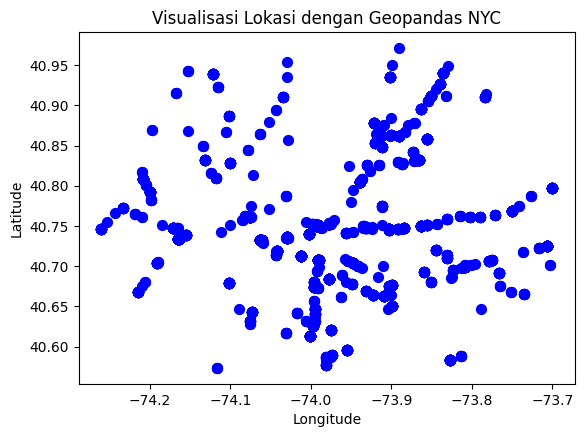

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Membuat kolom geometry dengan Point berdasarkan latitude dan longitude
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Plot data spasial
gdf.plot(marker='o', color='blue', markersize=50)
plt.title("Visualisasi Lokasi dengan Geopandas NYC")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

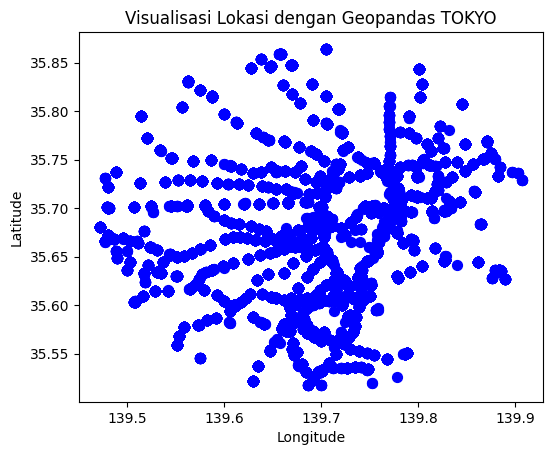

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Membuat kolom geometry dengan Point berdasarkan latitude dan longitude
geometry = [Point(xy) for xy in zip(df2['longitude'], df2['latitude'])]
gdf = gpd.GeoDataFrame(df2, geometry=geometry)

# Plot data spasial
gdf.plot(marker='o', color='blue', markersize=50)
plt.title("Visualisasi Lokasi dengan Geopandas TOKYO")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [ ]:
import plotly.express as px

# Visualisasi dengan Plotly
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", hover_name="venueCategory", zoom=10)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title="Peta Lokasi dengan Plotly", title_x=0.5)
fig.show()

In [ ]:
import plotly.express as px

# Visualisasi dengan Plotly
fig = px.scatter_mapbox(df2, lat="latitude", lon="longitude", hover_name="venueCategory", zoom=10)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title="Peta Lokasi dengan Plotly", title_x=0.5)
fig.show()

## ..

Nomor 1

<ipython-input-55-3d7f868b1f37>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['local_time'] = pd.to_datetime(data['utcTimestamp']) + pd.to_timedelta(data['timezoneOffset'], unit='m')


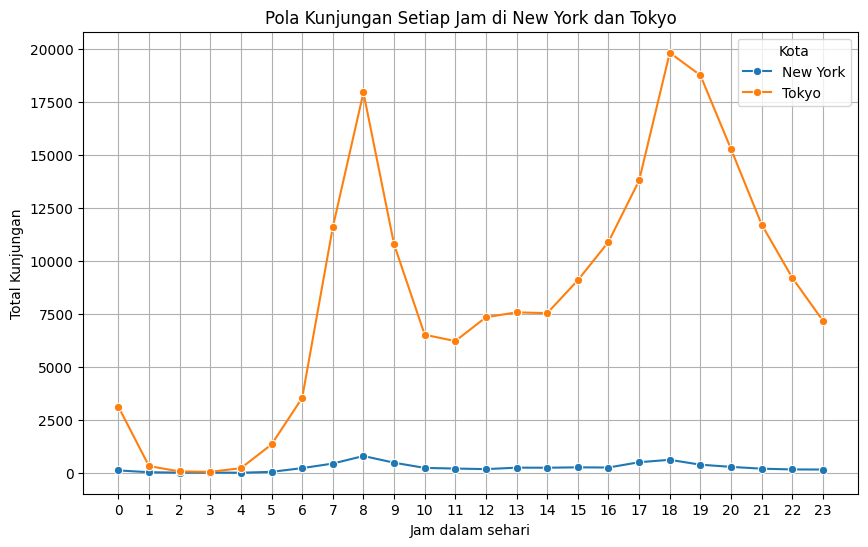

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Convert UTC timestamp to datetime and adjust to local time
data['local_time'] = pd.to_datetime(data['utcTimestamp']) + pd.to_timedelta(data['timezoneOffset'], unit='m')
data['hour'] = data['local_time'].dt.hour
data['day'] = data['local_time'].dt.date
# Filter only for train stations (venueCategory)
stations_data = data[data['venueCategory'] == 'Train Station']
# Group data to analyze peak hours
grouped = stations_data.groupby(['city', 'venueId', 'hour']).size().reset_index(name='visits')
# Aggregate for overall city patterns
city_patterns = stations_data.groupby(['city', 'hour']).size().reset_index(name='total_visits')
# --- Visualization 1: City-Wide Hourly Patterns ---
plt.figure(figsize=(10, 6))
sns.lineplot(data=city_patterns, x='hour', y='total_visits', hue='city', marker='o')
plt.title('Pola Kunjungan Setiap Jam di New York dan Tokyo')
plt.xlabel('Jam dalam sehari')
plt.ylabel('Total Kunjungan')
plt.xticks(range(0, 24))
plt.legend(title='Kota')
plt.grid(True)
plt.show()

<ipython-input-56-7215909821a0>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['local_time'] = pd.to_datetime(data['utcTimestamp']) + pd.to_timedelta(data['timezoneOffset'], unit='m')


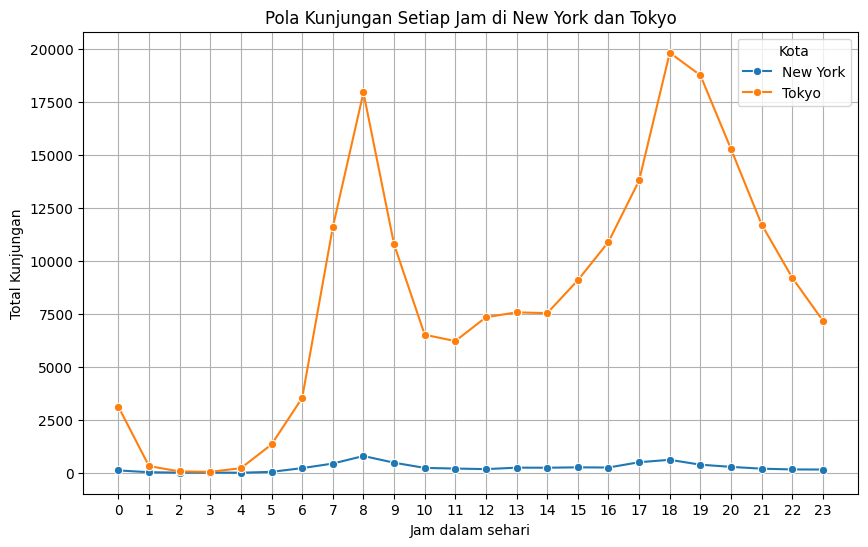

In [ ]:
data['local_time'] = pd.to_datetime(data['utcTimestamp']) + pd.to_timedelta(data['timezoneOffset'], unit='m')
data['hour'] = data['local_time'].dt.hour
data['day'] = data['local_time'].dt.date
stations_data = data[data['venueCategory'] == 'Train Station']
grouped = stations_data.groupby(['city', 'venueId', 'hour']).size().reset_index(name='visits')
city_patterns = stations_data.groupby(['city', 'hour']).size().reset_index(name='total_visits')

plt.figure(figsize=(10, 6))
sns.lineplot(data=city_patterns, x='hour', y='total_visits', hue='city', marker='o')
plt.title('Pola Kunjungan Setiap Jam di New York dan Tokyo')
plt.xlabel('Jam dalam sehari')
plt.ylabel('Total Kunjungan')
plt.xticks(range(0, 24))
plt.legend(title='Kota')
plt.grid(True)
plt.show()

## .

In [ ]:
# --- Visualization 3: Interactive Map ---
# Use Plotly to create a map of station locations with visit intensity
stations_summary = stations_data.groupby(['city', 'venueId', 'latitude', 'longitude']).size().reset_index(name='total_visits')

fig = px.scatter_mapbox(
    stations_summary,
    lat='latitude',
    lon='longitude',
    size='total_visits',
    color='city',
    hover_name='venueId',
    mapbox_style='carto-positron',
    title='Station Visit Intensity in New York and Tokyo'
)
fig.show()

In [ ]:
# --- Visualization 4: Identify Peak Hours ---
peak_hours = grouped.loc[grouped.groupby(['city', 'venueId'])['visits'].idxmax()]
print("Peak Hours for Each Station:")
print(peak_hours)

# Save peak hour information
peak_hours.to_csv('peak_hours_per_station.csv', index=False)

Peak Hours for Each Station:
           city                   venueId  hour  visits
18     New York  42829c80f964a5206a221fe3    18     105
33     New York  42911d00f964a520f5231fe3     9     142
58     New York  43fa07c9f964a520d92f1fe3    16       9
80     New York  49de0156f964a52021601fe3    18      36
103    New York  49f76cc2f964a5209d6c1fe3    18      22
...         ...                       ...   ...     ...
15238     Tokyo  50f3aa3ee4b02fd618fc3c34    16       2
15240     Tokyo  50f52ed4e4b0117953c30fed    19       1
15241     Tokyo  50f74ab7e4b0104b338055da    12       1
15242     Tokyo  50fbcddbe4b084af5b79666e    18       1
15243     Tokyo  51198bd0e4b0d4348c2f9977     9       1

[1587 rows x 4 columns]


## ..

<ipython-input-15-9a6dbd495c1a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataNYC['city'] = 'New York'
<ipython-input-15-9a6dbd495c1a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataTKY['city'] = 'Tokyo'
<ipython-input-15-9a6dbd495c1a>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['utc_time'] = pd.to_datetime(data['utcTimestamp'])


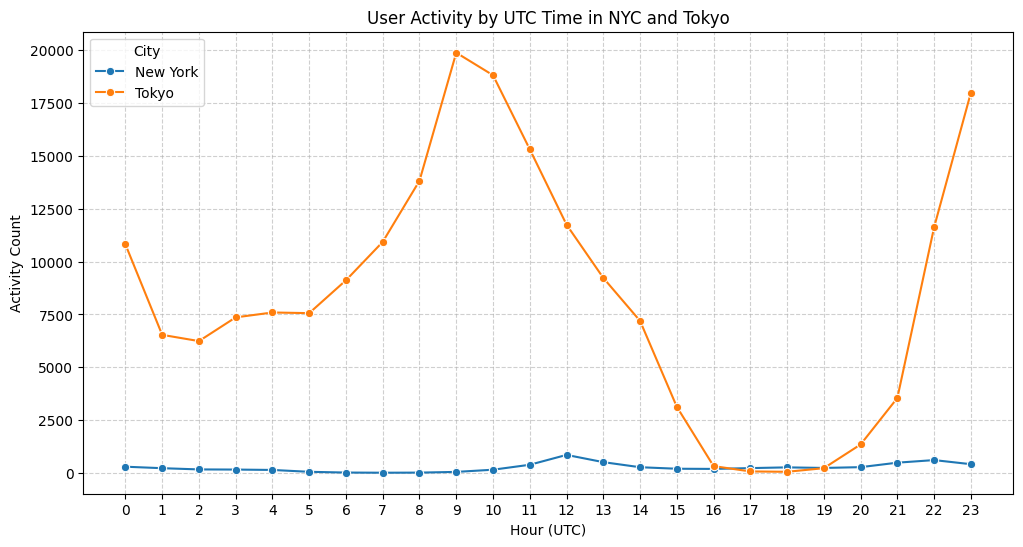

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Merge datasets for comparison
dataNYC['city'] = 'New York'
dataTKY['city'] = 'Tokyo'
data = pd.concat([dataNYC, dataTKY])

# Convert UTC timestamp to datetime
data['utc_time'] = pd.to_datetime(data['utcTimestamp'])

# Convert to local time using timezoneOffset
data['local_time'] = data['utc_time'] + pd.to_timedelta(data['timezoneOffset'], unit='m')
data['utc_hour'] = data['utc_time'].dt.hour  # Extract UTC hour
data['local_hour'] = data['local_time'].dt.hour  # Extract local hour

# Group data by city and hour (both UTC and local)
utc_activity = data.groupby(['city', 'utc_hour']).size().reset_index(name='activity_count')
local_activity = data.groupby(['city', 'local_hour']).size().reset_index(name='activity_count')

# --- Visualization 1: Comparison of Activity by UTC Time ---
plt.figure(figsize=(12, 6))
sns.lineplot(data=utc_activity, x='utc_hour', y='activity_count', hue='city', marker='o')
plt.title('User Activity by UTC Time in NYC and Tokyo')
plt.xlabel('Hour (UTC)')
plt.ylabel('Activity Count')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='City')
plt.show()

In [ ]:
# Mengecek apakah ada duplikat di seluruh baris
duplicates = df.duplicated()

# Menghitung jumlah duplikat
num_duplicates = duplicates.sum()

print(f"Jumlah data duplikat: {num_duplicates}")
# Menampilkan baris duplikat (jika ingin melihat data)
if num_duplicates > 0:
    duplicate_rows = df[duplicates]
    print("Contoh data duplikat:")
    print(duplicate_rows.head())


Jumlah data duplikat: 9
Contoh data duplikat:
       userId                   venueId           venueCategoryId  \
13510    1060  42829c80f964a5206a221fe3  4bf58dd8d48988d129951735   
32681     974  4a513b17f964a520d2b01fe3  4bf58dd8d48988d129951735   
35570     181  4a513b17f964a520d2b01fe3  4bf58dd8d48988d129951735   
37519    1074  42911d00f964a520f5231fe3  4bf58dd8d48988d129951735   
38446     647  4ad77a2bf964a520280b21e3  4bf58dd8d48988d129951735   

       venueCategory   latitude  longitude  timezoneOffset  \
13510  Train Station  40.752806 -73.977175            -240   
32681  Train Station  40.699023 -73.810015            -240   
35570  Train Station  40.699023 -73.810015            -240   
37519  Train Station  40.750795 -73.993576            -240   
38446  Train Station  40.719485 -74.042702            -240   

                         utcTimestamp      city  
13510  Fri Apr 13 13:19:19 +0000 2012  New York  
32681  Mon Apr 23 17:53:26 +0000 2012  New York  
35570  Wed Apr 2

In [ ]:
# Mengecek duplikasi berdasarkan kolom venueId
duplicates_venue = df.duplicated(subset=['venueId'])

# Jumlah total duplikasi pada venueId
num_duplicates_venue = duplicates_venue.sum()
print(f"Jumlah duplikat berdasarkan venueId: {num_duplicates_venue}")

# Menampilkan data duplikat berdasarkan venueId
if num_duplicates_venue > 0:
    duplicate_rows_venue = df[duplicates_venue]
    print("Contoh data duplikat berdasarkan venueId:")
    print(duplicate_rows_venue.head())


Jumlah duplikat berdasarkan venueId: 6120
Contoh data duplikat berdasarkan venueId:
     userId                   venueId           venueCategoryId  \
263     217  42829c80f964a5206a221fe3  4bf58dd8d48988d129951735   
467     402  42829c80f964a5206a221fe3  4bf58dd8d48988d129951735   
476     408  42829c80f964a5206a221fe3  4bf58dd8d48988d129951735   
556     619  42911d00f964a520f5231fe3  4bf58dd8d48988d129951735   
656     287  49f76cc2f964a5209d6c1fe3  4bf58dd8d48988d129951735   

     venueCategory   latitude  longitude  timezoneOffset  \
263  Train Station  40.752806 -73.977175            -240   
467  Train Station  40.752806 -73.977175            -240   
476  Train Station  40.752806 -73.977175            -240   
556  Train Station  40.750795 -73.993576            -240   
656  Train Station  40.734201 -74.164838            -240   

                       utcTimestamp      city  
263  Tue Apr 03 20:57:17 +0000 2012  New York  
467  Tue Apr 03 22:25:38 +0000 2012  New York  
476  Tue

<ipython-input-16-1e5b0e2421ab>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['utc_time'] = pd.to_datetime(data['utcTimestamp'], utc=True)


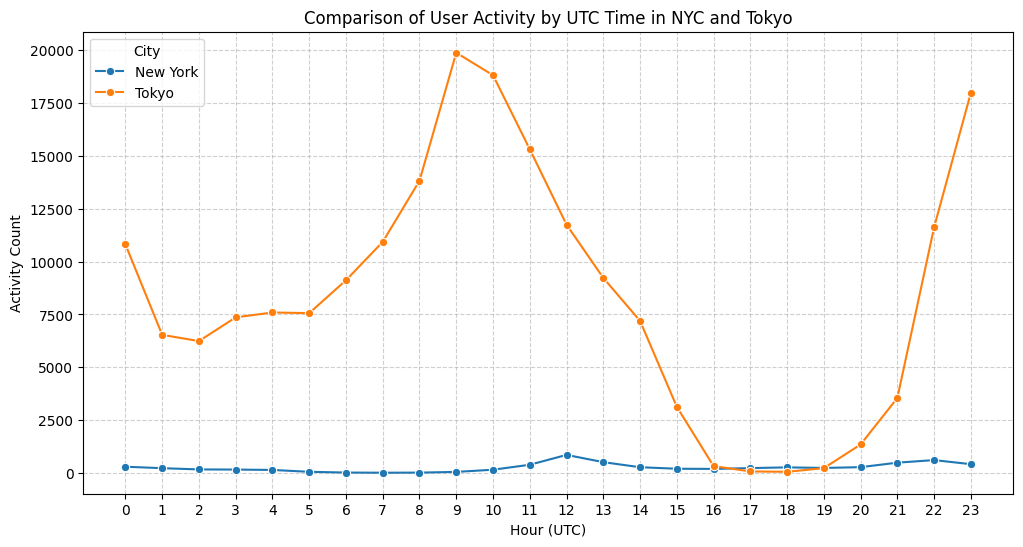

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert UTC timestamp to datetime
data['utc_time'] = pd.to_datetime(data['utcTimestamp'], utc=True)

# Extract UTC hour
data['utc_hour'] = data['utc_time'].dt.hour

# Group data by city and UTC hour
utc_activity = data.groupby(['city', 'utc_hour']).size().reset_index(name='activity_count')

# --- Visualization: Comparison of Activity by UTC Time ---
plt.figure(figsize=(12, 6))
sns.lineplot(data=utc_activity, x='utc_hour', y='activity_count', hue='city', marker='o')
plt.title('Comparison of User Activity by UTC Time in NYC and Tokyo')
plt.xlabel('Hour (UTC)')
plt.ylabel('Activity Count')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='City')
plt.show()

Total visits to stations in NYC: 6408
Total visits to stations in Tokyo: 200428


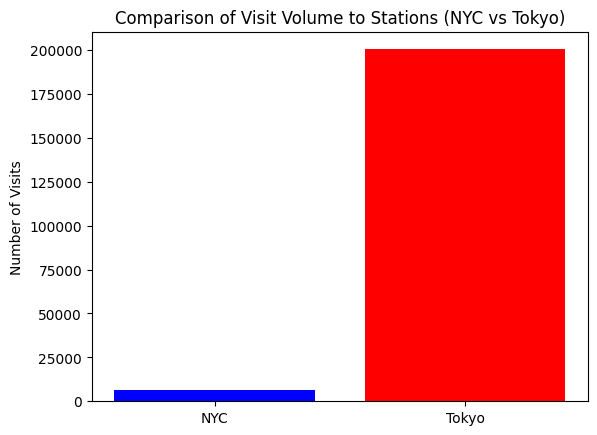

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Filter data untuk kategori "Train Station" (atau kategori yang relevan)
stations_nyc = dataNYC[dataNYC['venueCategory'].str.contains('Station', na=False)]
stations_tky = dataTKY[dataTKY['venueCategory'].str.contains('Station', na=False)]

# Hitung jumlah kunjungan per stasiun
volume_nyc = stations_nyc['venueId'].value_counts()
volume_tky = stations_tky['venueId'].value_counts()

# Total kunjungan untuk NYC dan Tokyo
total_nyc = volume_nyc.sum()
total_tky = volume_tky.sum()

print(f"Total visits to stations in NYC: {total_nyc}")
print(f"Total visits to stations in Tokyo: {total_tky}")

# Visualisasi perbandingan volume kunjungan
data = {'NYC': total_nyc, 'Tokyo': total_tky}
plt.bar(data.keys(), data.values(), color=['blue', 'red'])
plt.title('Comparison of Visit Volume to Stations (NYC vs Tokyo)')
plt.ylabel('Number of Visits')
plt.show()


## nomor 3

<ipython-input-57-d8c81cdc4f49>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['utc_time'] = pd.to_datetime(data['utcTimestamp'], utc=True)


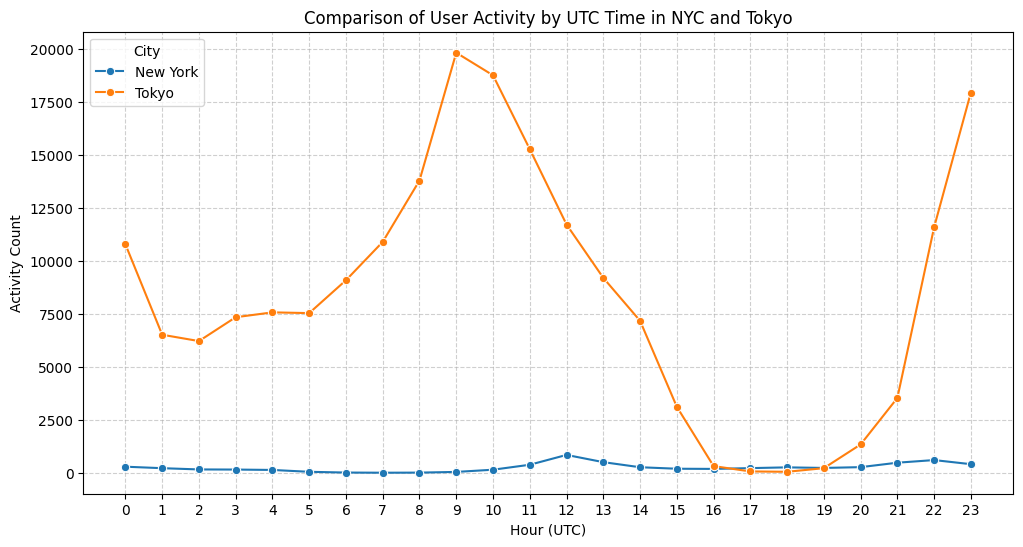

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data['utc_time'] = pd.to_datetime(data['utcTimestamp'], utc=True)
# Extract UTC hour
data['utc_hour'] = data['utc_time'].dt.hour
# Group data by city and UTC hour
utc_activity = data.groupby(['city', 'utc_hour']).size().reset_index(name='activity_count')
# --- Visualization: Comparison of Activity by UTC Time ---
plt.figure(figsize=(12, 6))
sns.lineplot(data=utc_activity, x='utc_hour', y='activity_count', hue='city', marker='o')
plt.title('Comparison of User Activity by UTC Time in NYC and Tokyo')
plt.xlabel('Hour (UTC)')
plt.ylabel('Activity Count')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='City')
plt.show()

## nomor 2

<ipython-input-58-93dc30b59eb3>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_visits, x='city', y='total_visits', palette='Set2')


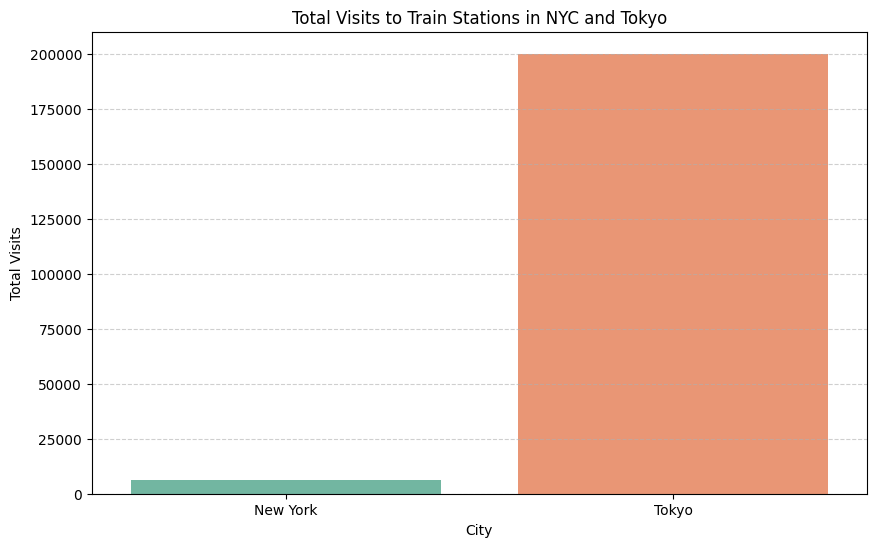

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

stations_data = data[data['venueCategory'] == 'Train Station']

# Calculate total visits per station and per city
station_visits = stations_data.groupby(['city', 'venueId']).size().reset_index(name='total_visits')
city_visits = stations_data.groupby('city').size().reset_index(name='total_visits')

# --- Visualization 1: Bar Plot Comparing Total Visits by City ---
plt.figure(figsize=(10, 6))
sns.barplot(data=city_visits, x='city', y='total_visits', palette='Set2')
plt.title('Total Visits to Train Stations in NYC and Tokyo')
plt.xlabel('City')
plt.ylabel('Total Visits')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

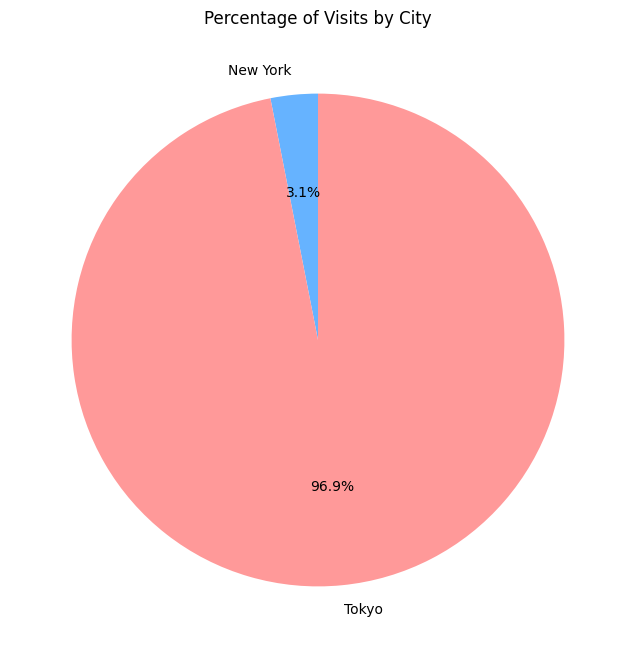

In [ ]:
# --- Visualization 3: Pie Chart for City-Level Visit Shares ---
plt.figure(figsize=(8, 8))
plt.pie(city_visits['total_visits'], labels=city_visits['city'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Percentage of Visits by City')
plt.show()

In [ ]:
# --- Visualization 4: Interactive Bar Chart by Station ---
fig = px.bar(
    station_visits,
    x='venueId',
    y='total_visits',
    color='city',
    title='Station-Level Visit Comparison: NYC vs Tokyo',
    labels={'venueId': 'Station ID', 'total_visits': 'Total Visits'},
    barmode='group'
)
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

## new num

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('bank_visits.csv')  # Pastikan dataset memiliki kolom utcTimestamp

# Convert 'utcTimestamp' to datetime
data['utcTimestamp'] = pd.to_datetime(data['utcTimestamp'])

# Extract day of the week
data['day_of_week'] = data['utcTimestamp'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Classify days into 'Weekday' and 'Weekend'
data['day_type'] = data['day_of_week'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

# Count visits by day type
visit_counts = data.groupby('day_type').size().reset_index(name='visit_count')

# --- Visualization: Bar Plot Comparing Visits ---
plt.figure(figsize=(8, 5))
sns.barplot(data=visit_counts, x='day_type', y='visit_count', palette='Set2')
plt.title('Comparison of Bank Visits: Weekdays vs Weekends')
plt.xlabel('Day Type')
plt.ylabel('Number of Visits')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()